In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
data_path = "..\youniverse\data"
channels = pd.read_csv(data_path + '\df_channels.tsv', sep='\t')

Loading data...


# Data Cleaning

The following steps will focus on data preprocessing to prepare the dataset for further analysis.

In [4]:
cleaned_channels = channels.copy()

In [5]:
cleaned_channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156977 entries, 0 to 156976
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_cc         156846 non-null  object 
 1   join_date           156976 non-null  object 
 2   channel             156977 non-null  object 
 3   name_cc             156965 non-null  object 
 4   subscribers_cc      156977 non-null  int64  
 5   videos_cc           156977 non-null  int64  
 6   subscriber_rank_sb  153330 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.4+ MB


#### join_date

In [7]:
cleaned_channels[cleaned_channels['join_date'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
33540,Entertainment,NaN,UCBR8-60-B28hp2BmDPdntcQ,YouTube,28200000,301,110.0


In [8]:
cleaned_channels.drop(33540, inplace=True)

In [9]:
cleaned_channels[cleaned_channels['join_date'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb


#### name_cc

In [11]:
cleaned_channels[cleaned_channels['name_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
8231,Entertainment,2014-01-01,UCMzbrcOG-edOxonhLbsOD4Q,NaN,112543,118,140756.0
8232,Gaming,2015-02-01,UCJIYgIBaQt0YcGO73VCLPyg,NaN,57000,180,266879.0
8233,Entertainment,2007-03-27,UCp5Tpg0lLGtsG88CvUKey_A,NaN,12400,362,789457.0
8234,Entertainment,2016-07-09,UCmOiT9ZnSvLZ1XMBFjGiNmQ,NaN,55100,26,249430.0
8235,Film and Animation,2016-09-27,UChiZ8VX_WjTGvhpxHub16_A,NaN,31600,55,349306.0
8236,Entertainment,2009-03-12,UCgtijEzltp6pTR6ezYCwUQQ,NaN,16500,59,662889.0
8237,Gaming,2016-05-26,UCv_OpX7RULreDQOhZlVLuUw,NaN,11000,108,929597.0
8238,Music,2011-12-31,UCA67sOj4L0qlqOHQZsmUhVw,NaN,15200,68,736183.0
8239,Entertainment,2007-12-04,UCYj8nTwafpwx0T8wKkWuwag,NaN,42000,10,338910.0
8240,Music,2011-08-26,UCq-68gzHO5ulmrZ2tW-jyTg,NaN,19800,390,535474.0


In [12]:
cleaned_channels['name_cc'].fillna('unknown name', inplace=True)

In [13]:
cleaned_channels[cleaned_channels['name_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb


#### category_cc

In [15]:
cleaned_channels[cleaned_channels['category_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
3100,NaN,2011-11-10,UCUC0f5Lu42bIi9IClnYP4zw,PixarMoviesOnDemand,138000,16,126929.0
5002,NaN,2006-04-08,UCJdx55eTMBJI9dwuP65xcSg,nevake,28600,9168,444224.0
5113,NaN,2016-07-24,UCfL3FVHRncVVoBnVI_EI8vw,spoiled milk,10600,33,938514.0
5143,NaN,2014-02-17,UCDhrs5GhG2t1Ov3oya3K4tg,TwitchPlaysPokemon,10300,342,977938.0
5638,NaN,2007-05-29,UCBgt-JTMivpgj-sHaea6M-Q,New Music,22800,398,507809.0
...,...,...,...,...,...,...,...
146651,NaN,2013-04-09,UC-jhZdJL4gDmATXCqMkM7pA,EtherealExposition,16435,63,631214.0
149433,NaN,2006-05-12,UCVEfyEuLJpgw_y4jSgV8Rtg,lonelygirl15,173903,396,100037.0
150554,NaN,2011-06-14,UC_3JbOmL48TMal015yX13Iw,FyreUK [ARCHIVE],303000,466,60223.0
151278,NaN,2008-11-17,UCEPE1gwLMgNmTFQSSfXAIcg,Danielle Lowe,36300,78,346694.0


In [16]:
print(f'the channels with unknown category represent : {13100/len(channels)}%')

the channels with unknown category represent : 0.08345171585646305%


The **channels with unknown category** represent **less than 0.01%** of the total data, we can drop them.

In [18]:
cleaned_channels = cleaned_channels[cleaned_channels['category_cc'].notna()]

In [19]:
cleaned_channels[cleaned_channels['category_cc'].isna()]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb


#### subscriber_rank_sb

In [21]:
cleaned_channels.sort_values(by = 'subscribers_cc', ascending=False)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
29058,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0
16032,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0
43231,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0
35502,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0
40878,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0
...,...,...,...,...,...,...,...
80084,Music,2017-07-27,UCbKqo5ccPuQad_17MoSxpvw,Ayanami,10000,20,876195.0
152522,Entertainment,2014-05-02,UC-AKZXBB30O4ZM5zVLGUPCg,ArabianRider,10000,212,977030.0
118797,Music,2011-08-27,UCVXWrVUv_Pbt24btuuIDvqw,Densle,10000,60,944207.0
13068,Music,2016-04-30,UCu4TumUmUdU_YmbSuvEOvNg,Trailer Music Empire...,10000,157,812348.0


The 'subscriber_rank_sb' feature is incorrect, as we can se it above.

In [23]:
cleaned_channels['subscriber_rank_sb'] = cleaned_channels['subscribers_cc'].rank(ascending=False, method='dense')

In [24]:
cleaned_channels.sort_values(by = 'subscribers_cc', ascending=False)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
29058,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,1.0
16032,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,2.0
43231,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,3.0
35502,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,4.0
40878,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,5.0
...,...,...,...,...,...,...,...
80084,Music,2017-07-27,UCbKqo5ccPuQad_17MoSxpvw,Ayanami,10000,20,31237.0
152522,Entertainment,2014-05-02,UC-AKZXBB30O4ZM5zVLGUPCg,ArabianRider,10000,212,31237.0
118797,Music,2011-08-27,UCVXWrVUv_Pbt24btuuIDvqw,Densle,10000,60,31237.0
13068,Music,2016-04-30,UCu4TumUmUdU_YmbSuvEOvNg,Trailer Music Empire...,10000,157,31237.0


The problem is fixed

In [26]:
cleaned_channels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156845 entries, 0 to 156976
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_cc         156845 non-null  object 
 1   join_date           156845 non-null  object 
 2   channel             156845 non-null  object 
 3   name_cc             156845 non-null  object 
 4   subscribers_cc      156845 non-null  int64  
 5   videos_cc           156845 non-null  int64  
 6   subscriber_rank_sb  156845 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 9.6+ MB


#### Type conversion

In [28]:
cleaned_channels['subscriber_rank_sb'] = cleaned_channels['subscriber_rank_sb'].astype('int64')

In [29]:
cleaned_channels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156845 entries, 0 to 156976
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category_cc         156845 non-null  object
 1   join_date           156845 non-null  object
 2   channel             156845 non-null  object
 3   name_cc             156845 non-null  object
 4   subscribers_cc      156845 non-null  int64 
 5   videos_cc           156845 non-null  int64 
 6   subscriber_rank_sb  156845 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.6+ MB


#### Feature creation

In [31]:
datetime_column = pd.to_datetime(cleaned_channels['join_date'])
cleaned_channels['year'] = datetime_column.dt.year
cleaned_channels['month'] = datetime_column.dt.month
cleaned_channels['day'] = datetime_column.dt.day

In [32]:
cleaned_channels.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,year,month,day
0,Film and Animation,2017-05-21,UCBJuEqXfXTdcPSbGO9qqn1g,MagnusNation,65100,28,15856,2017,5,21
1,Entertainment,2011-12-13,UCkNW9Q1VR_aeZ6uht83jJVQ,Mago Dario Animazion...,60200,48,16388,2011,12,13
2,Music,2008-03-17,UCXhkGgooXHDNwgJXmoTSN7g,Mago Merlino,14800,838,27869,2008,3,17
3,Entertainment,2014-10-19,UCvZGsuvKlYOGiZTsxwJNS5Q,MAGO TOMÁS,26200,31,22950,2014,10,19
4,Comedy,2017-01-15,UCxJWPpPED-J24znoKyKZYjg,Magog of Morskar,29400,158,21938,2017,1,15


## Full cleaning pipeline

After testing various preprocessing steps, we've combined them into a single cleaning pipeline that performs all the necessary tasks, including handling missing data, removing irrelevant rows, ranking channels by subscriber count, and creating date features.

In [35]:

def cleaning_pipeline(data):

    cleaned_data = data.copy()
    
        # delete the line with joint_data = NaN
    cleaned_data.drop(33540, inplace = True)

        # remplace name_cc that are NaN by 'unknown name'
    cleaned_data['name_cc'].fillna('unknown name', inplace=True)

        # drop channels with unknown category
    cleaned_data = cleaned_data[cleaned_data['category_cc'].notna()]

        # recreate the subscriber_rank_sb
    cleaned_data['subscriber_rank_sb'] = cleaned_data['subscribers_cc'].rank(ascending=False, method='dense')

        # subscriber_rank_sb type conversion
    cleaned_data['subscriber_rank_sb'] = cleaned_data['subscriber_rank_sb'].astype('int64')

        # date feature creation
    datetime_column = pd.to_datetime(cleaned_data['join_date'])
    cleaned_data['year'] = datetime_column.dt.year
    cleaned_data['month'] = datetime_column.dt.month
    cleaned_data['day'] = datetime_column.dt.day

    return cleaned_data
    

In [36]:
clean_data = cleaning_pipeline(channels)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156845 entries, 0 to 156976
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category_cc         156845 non-null  object
 1   join_date           156845 non-null  object
 2   channel             156845 non-null  object
 3   name_cc             156845 non-null  object
 4   subscribers_cc      156845 non-null  int64 
 5   videos_cc           156845 non-null  int64 
 6   subscriber_rank_sb  156845 non-null  int64 
 7   year                156845 non-null  int32 
 8   month               156845 non-null  int32 
 9   day                 156845 non-null  int32 
dtypes: int32(3), int64(3), object(4)
memory usage: 11.4+ MB


# Data Exploration

### Introduction

In this section, we'll examine the total number of categories and create a color palette for use in upcoming plots with a cleaned data.

In [40]:
channels = clean_data.copy()

the data set channels contains all channels with **>10k subscribers** and **>10 videos**

In [42]:
def get_unique_values(data, feature):
    return data[feature].unique().tolist()

In [43]:
categories_list = get_unique_values(channels, 'category_cc')
categories_list

['Film and Animation',
 'Entertainment',
 'Music',
 'Comedy',
 'Gaming',
 'Science & Technology',
 'Sports',
 'Education',
 'People & Blogs',
 'Nonprofits & Activism',
 'Howto & Style',
 'News & Politics',
 'Travel & Events',
 'Autos & Vehicles',
 'Pets & Animals']

In [44]:
print(f'There are {len(categories_list)} categories')

There are 15 categories


Using always the same colors for each category helps make plots easier to compare.

In [46]:
category_colors = {
    'Film and Animation': '#4C72B0',   # Soft Blue
    'Entertainment': '#DD8452',         # Warm Orange
    'Music': '#55A868',                 # Soft Green
    'Comedy': '#C44E52',                # Deep Red
    'Gaming': '#8172B2',                # Muted Purple
    'Science & Technology': '#8C564B',  # Warm Brown
    'Sports': '#E377C2',                # Vibrant Pink
    'Education': '#7F7F7F',             # Neutral Grey
    'People & Blogs': '#BCBD22',        # Fresh Yellow-green
    'Nonprofits & Activism': '#17BECF', # Cool Light Blue
    'Howto & Style': '#FFB74D',         # Light Orange
    'News & Politics': '#F28E2B',       # Bold Red-Orange
    'Travel & Events': '#C5B0D5',       # Lavender Purple
    'Autos & Vehicles': '#9E7C4D',      # Earthy Tan
    'Pets & Animals': '#F7B6D2'         # Soft Light Pink
}

### Channel Categories Distribution

To start, we visualize the distribution of YouTube channel categories to gain an overview of their relative proportions.

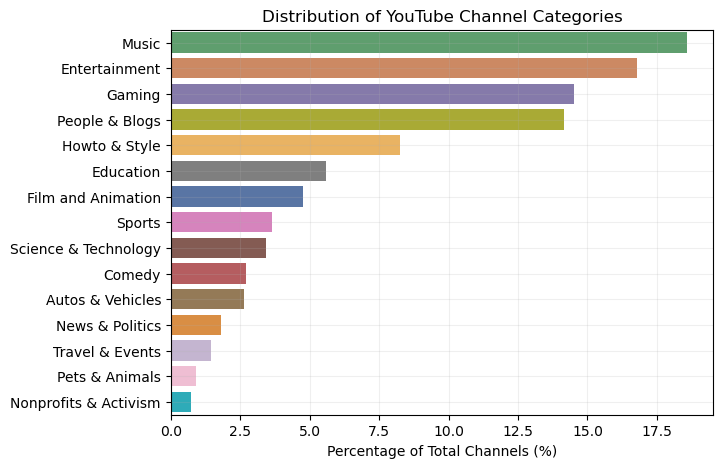

In [49]:

def plot_category_distribution(data, category_colors):

    distribution = data['category_cc'].value_counts(normalize=True).sort_values(ascending=False)*100
    df_dist = distribution.reset_index()
    df_dist.columns = ['category', 'percentage']
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x='percentage', data=df_dist, palette=df_dist['color'])
    plt.grid(alpha=0.2)
    plt.xlabel('Percentage of Total Channels (%)')
    plt.ylabel('')
    plt.title('Distribution of YouTube Channel Categories')

    plt.show()

plot_category_distribution(channels, category_colors)


Categories such as Nonprofits & Activism and Pets & Animals are more niche, resulting in fewer channels. On the other hand, Music, Entertainment, Gaming, and People & Blogs dominate with the highest number of YouTube channels. To better understand the dominance of these categories, we calculate their representation among all YouTube channels.

In [51]:
def get_cumulative_percentage_top_k(data, k):

    distribution = data['category_cc'].value_counts(normalize=True).sort_values(ascending=False) * 100
    df_dist = distribution.reset_index()
    df_dist.columns = ['category', 'percentage']
    
    cumulative_percentage = df_dist.head(k)['percentage'].sum()
    
    return cumulative_percentage

top_k_cumulative_percentage = get_cumulative_percentage_top_k(channels, k=4)
print(top_k_cumulative_percentage.round(2), '%')

64.05 %


The four categories : **Music, Entertainment, Gaming and People & Blogs** represent **64%** of the total number of youtube channels.

### Subscribers Categories Distribution

Let's now visualize the distribution of subscribers across YouTube channel categories to explore how audiences are distributed.

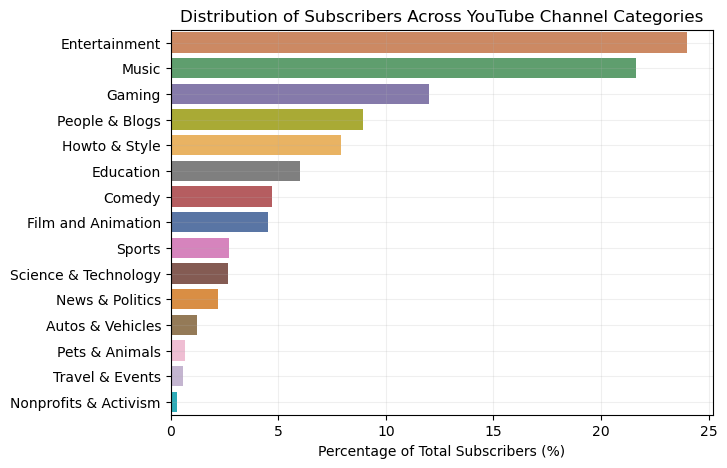

In [55]:

def plot_category_subscribers_distribution(data, category_colors):

    total_number_of_subscribers = channels['subscribers_cc'].sum()
    df_dist = channels.groupby('category_cc')['subscribers_cc'].sum().reset_index().sort_values(ascending=False, by='subscribers_cc')
    df_dist.columns = ['category', 'subscribers']
    df_dist['subscribers'] = 100 * df_dist['subscribers'] / total_number_of_subscribers
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x='subscribers', data=df_dist, palette=df_dist['color'])

    plt.grid(alpha=0.2)
    plt.xlabel('Percentage of Total Subscribers (%)')
    plt.ylabel('')
    plt.title('Distribution of Subscribers Across YouTube Channel Categories')

    plt.show()

plot_category_subscribers_distribution(channels, category_colors)

As expected, Entertainment, Music, Gaming, and People & Blogs also lead in this plot, as these categories have the highest number of channels and tend to attract the most viewers. In contrast, people are less likely to subscribe to niche content. Now, let's take a closer look at the percentage representation of the top 4 categories.

In [57]:
def get_cumulative_subscribers_percentage_top_k(data, k):
    total_number_of_subscribers = data['subscribers_cc'].sum()
    df_dist = data.groupby('category_cc')['subscribers_cc'].sum().reset_index().sort_values(ascending=False, by='subscribers_cc')
    df_dist.columns = ['category', 'subscribers']
    df_dist['subscribers'] = 100 * df_dist['subscribers'] / total_number_of_subscribers
    cumulative_percentage = df_dist.head(k)['subscribers'].sum()
    return cumulative_percentage

top_k_cumulative_subscribers_percentage = get_cumulative_subscribers_percentage_top_k(channels, k=4)
print(top_k_cumulative_subscribers_percentage.round(2), '%')

66.55 %


The four same categories : **Music, Entertainment, Gaming and People & Blogs** have **67%** of the total number of subscribers.

In [59]:

# Function that plot the mean or total number of the feature for each category.
# This function can be used for videos_cc, subscribers_cc or views in the time series data set
def plot_feature_by_category(data, feature, category_colors, agg_mode='mean', title=None):

    aggregation_methods = {'mean': 'mean', 'total': 'sum'}
    
    df_dist = data.groupby('category_cc')[feature].agg(aggregation_methods[agg_mode]).reset_index()
    df_dist.columns = ['category', feature]
    df_dist = df_dist.sort_values(ascending=False, by=feature)
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x=feature, data=df_dist, palette=df_dist['color'])

    if feature == 'videos_cc':
        feature = 'Videos'
    if feature == 'subscribers_cc':
        feature = 'Subscribers'

    if agg_mode == 'mean':
        agg_mode='Average'

    plt.grid(alpha=0.2)
    plt.xlabel(f'{agg_mode.capitalize()} number of {feature}')
    plt.ylabel('')
    plt.title(f'{agg_mode.capitalize()} number of {feature} in each category')

    plt.show()


## Videos Per Category

Let's now visualize the average number of videos per channel for each category to understand content creation patterns.

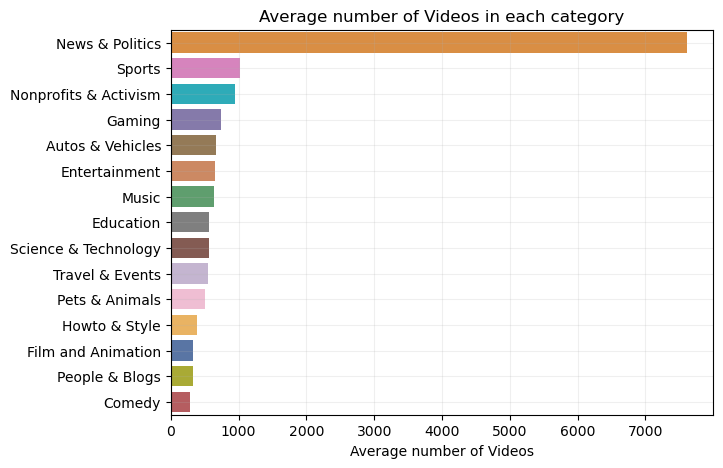

In [62]:
plot_feature_by_category(channels, 'videos_cc', category_colors, agg_mode = 'mean')

News & Politics channels have the highest number of videos per channel by far, publishing numerous videos each day to cover global events.

Next, let's plot the total number of videos across all channels per category to compare the overall content volume.

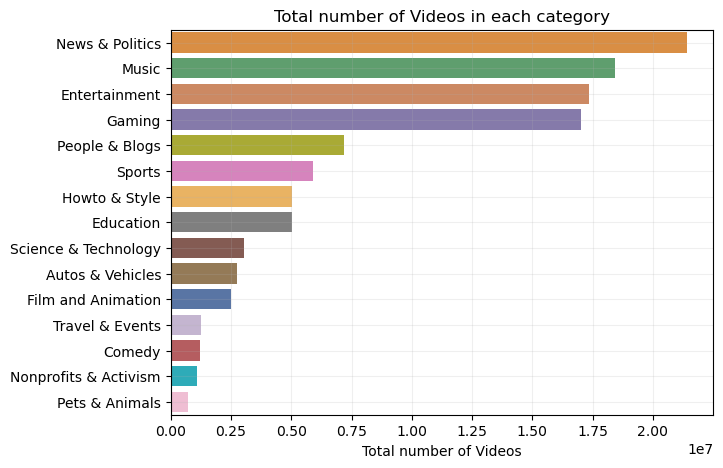

In [65]:
plot_feature_by_category(channels, 'videos_cc', category_colors, agg_mode = 'total')

News & Politics remain in the lead despite their relatively low number of channels thanks to their large amount of videos, they are closely followed by categories like Entertainment, Music, and Gaming, which have a significantly larger number of channels.

### Channel Creation Date per Category

Next, we visualize the average join date for each category to compare the relative age of channels across different categories.

In [69]:
def plot_mean_join_date_by_category(data, category_colors):

    data['float_join_date'] = data['year'] + (data['month'].apply(lambda x:x-1)) * (1/12) + (data['day'].apply(lambda x:x-1)) *  (1/30)
    df_dist = data.groupby('category_cc')['float_join_date'].mean().reset_index()
    df_dist.columns = ['category', 'join_date']
    df_dist = df_dist.sort_values(ascending=False, by='join_date')
    df_dist['color'] = df_dist['category'].map(category_colors)

    plt.figure(figsize=(7, 5))
    sns.barplot(y='category', x='join_date', data=df_dist, palette=df_dist['color'])

    plt.grid(alpha=0.2)
    plt.xlim(2011, 2016)
    plt.xlabel('Average join date')
    plt.ylabel('')
    plt.title('Average join date for each category')

    plt.show()
    

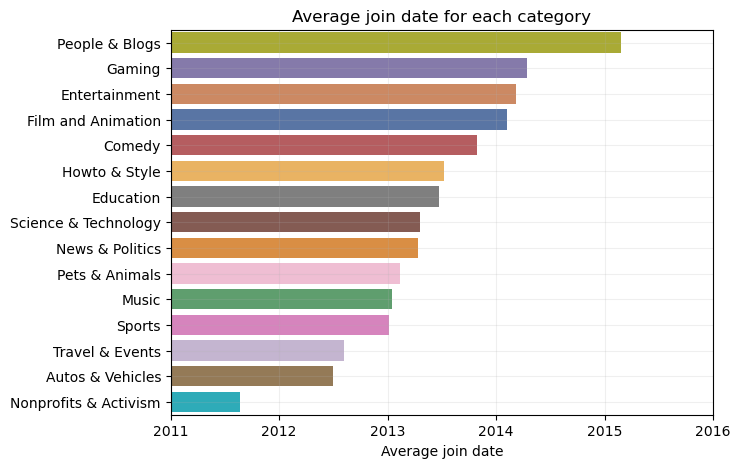

In [70]:
plot_mean_join_date_by_category(channels, category_colors)

On average, the oldest channels are found in the Nonprofits & Activism and Auto & Vehicles categories, likely due to their long-established presence and stable audience. In contrast, the most recent channels, driven by trends and shifting interests, are found in People & Blogs and Gaming.

# Time Series DataSet

Thanks to the development of recommendation algorithms, people tend to watch videos presented to them on the YouTube home page. Some channels have a high number of subscribers but do not receive many views. As a result, the number of subscribers is no longer a reliable indicator of a channel's performance.

In [74]:
print("Loading data...")
data_path = "..\youniverse\data"
time_series = pd.read_csv(data_path + '\df_timeseries.tsv', sep='\t')

Loading data...


## Data Cleaning

In [76]:
time_series.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [77]:
col_with_missing_values = [col for col in time_series.columns if time_series[col].isnull().sum() > 0]

print("Columns with missing values :", col_with_missing_values)

Columns with missing values : ['category']


In [78]:
number_of_missing_categories = time_series['category'].isna().sum()
print(f'{ 100 * number_of_missing_categories/len(time_series)} % of categories values are missing')

0.09709725240015055 % of categories values are missing


Less than **0.1%** of channels have unknown category, we can drop them.

In [80]:
cleaned_time_series = time_series[time_series['category'].notna()]

We can create a pipeline that performs cleaning and data conversion.

In [82]:

def time_series_cleaning_pipeline(data):

    data = data.copy()
        # Remove the lines with unknown category
    data = data[data['category'].notna()]
        # turn the datatime column to a pd.datetime
    data['datetime'] = pd.to_datetime(data['datetime'])

    return data
    

## Data Exploration

In [84]:
time_series = time_series_cleaning_pipeline(time_series)

### Views per categories

In [86]:

df_channels_views = time_series.groupby(['channel', 'category'])[['delta_views', 'delta_videos']].sum().reset_index()
    # Rename columns.
df_channels_views = df_channels_views.rename(columns={'category': 'category_cc', 'delta_videos' : 'total_videos', 'delta_views' : 'total_views' })
    # Drops the lines with total_number of videos == 0
df_channels_views = df_channels_views[df_channels_views['total_videos'] != 0]
    # Creation of the column corresponding to the average number of views per videos.
df_channels_views['views'] = df_channels_views['total_views'] / df_channels_views['total_videos']
    

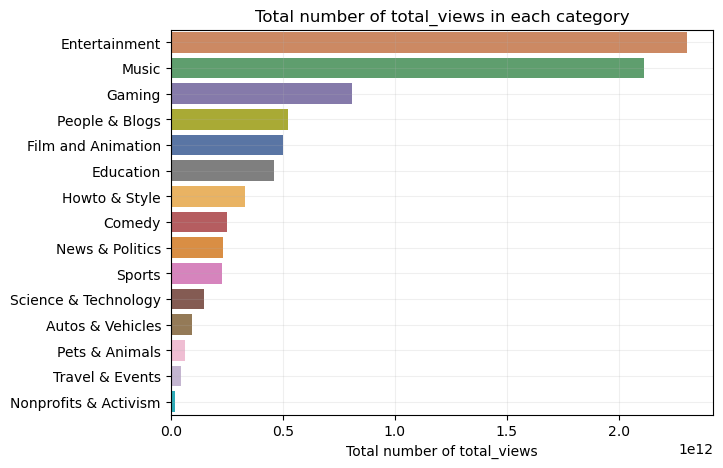

In [87]:
plot_feature_by_category(df_channels_views, 'total_views', category_colors, agg_mode='total')

The categories that gather the most views are Entertainment and Music, as these categories are more general and trendy. In contrast, more niche categories like Autos & Vehicles, Pets & Animals, or Travel & Events are more specialized.

### Ratio Views / Subscribers

In [90]:

def plot_ratio_views_subscribers(data, category_colors):

    data = data.copy()
        # Creation of the ratio (Views per videos / subscribers)
    data['ratio_views_subs'] = data['views'] / data['subscribers_cc']
    df_ratio = data.groupby('category_cc')['ratio_views_subs'].mean().reset_index()
    df_ratio = df_ratio.sort_values(by='ratio_views_subs', ascending=False)
        # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_ratio, y='category_cc', x='ratio_views_subs', palette=category_colors)
    plt.xlabel('Views per videos / Subscribers per Channel (Ratio)')
    plt.ylabel('')
    plt.title('Views per videos / Subscribers per Channel by Category')
    plt.grid(alpha=0.3)
    plt.show()
    

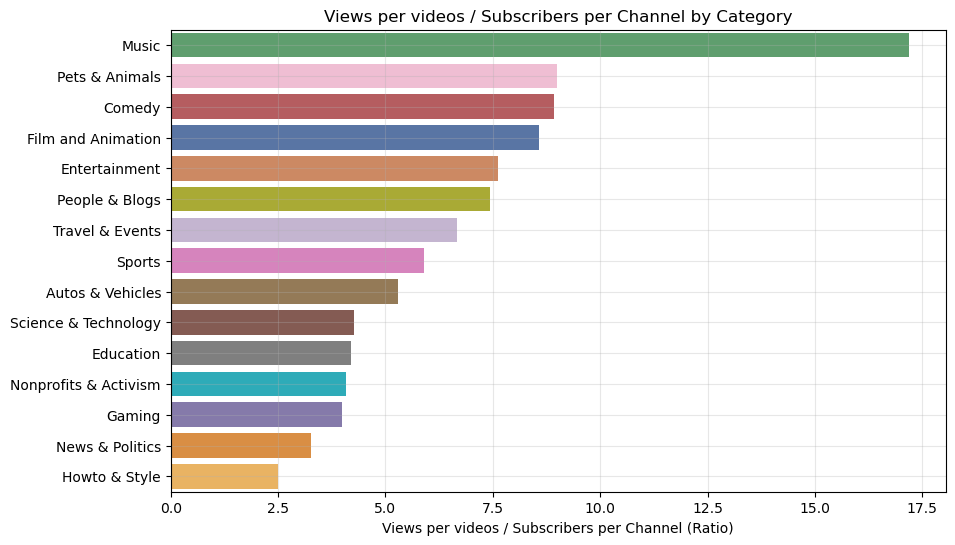

In [91]:
df_channels_views = df_channels_views.merge(channels[['channel', 'subscribers_cc']], on='channel', how='left')
plot_ratio_views_subscribers(df_channels_views, category_colors)

Since the creation of recommendation algorithms, fewer people watch videos from their subscribers list and tend to click on videos shown on their home page. Categories like Music are recommended to more people, but users don’t subscribe as much. The same scenario applies to categories like Comedy or Film & Animation. In contrast, Gaming or News & Politics offer more specialized content and are recommended primarily to fans. This graph is strongly correlated to whether a channel targets a general audience.

### Views and subscribers, time evolution

In [94]:

def plot_monthly_metric_by_category(data, metric='delta_views'):
    
    data['month'] = data['datetime'].dt.to_period('M')
    
    if metric not in ['delta_views', 'delta_subs']:
        raise ValueError("Metric must be either 'delta_views' or 'delta_subs'")
    
    monthly_data = data.groupby(['category', 'month'])[metric].sum().reset_index()
    
    monthly_metric_pivot = monthly_data.pivot(index='month', columns='category', values=metric)

    title = "Total Monthly " + ("Views" if metric == 'delta_views' else "Subscriber Gains") + " by Category"
    ylabel = "Total " + ("Views" if metric == 'delta_views' else "Subscriber Gains")
    
    monthly_metric_pivot.plot(figsize=(12, 6), title=title)
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(alpha=0.3)
    plt.show()


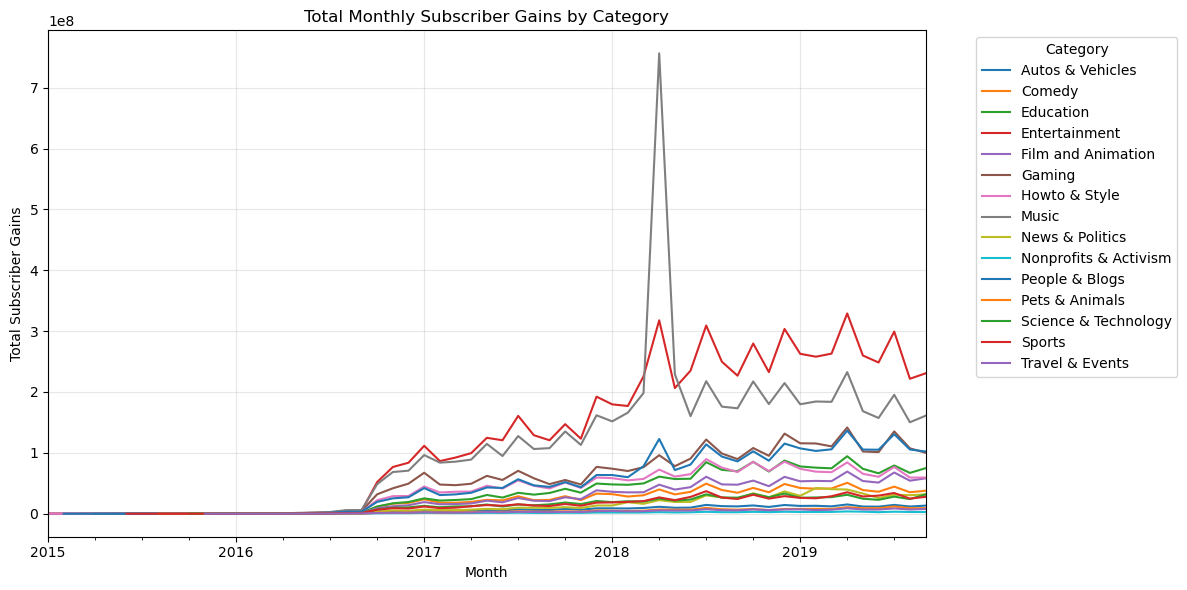

In [95]:
plot_monthly_metric_by_category(time_series, metric='delta_subs')

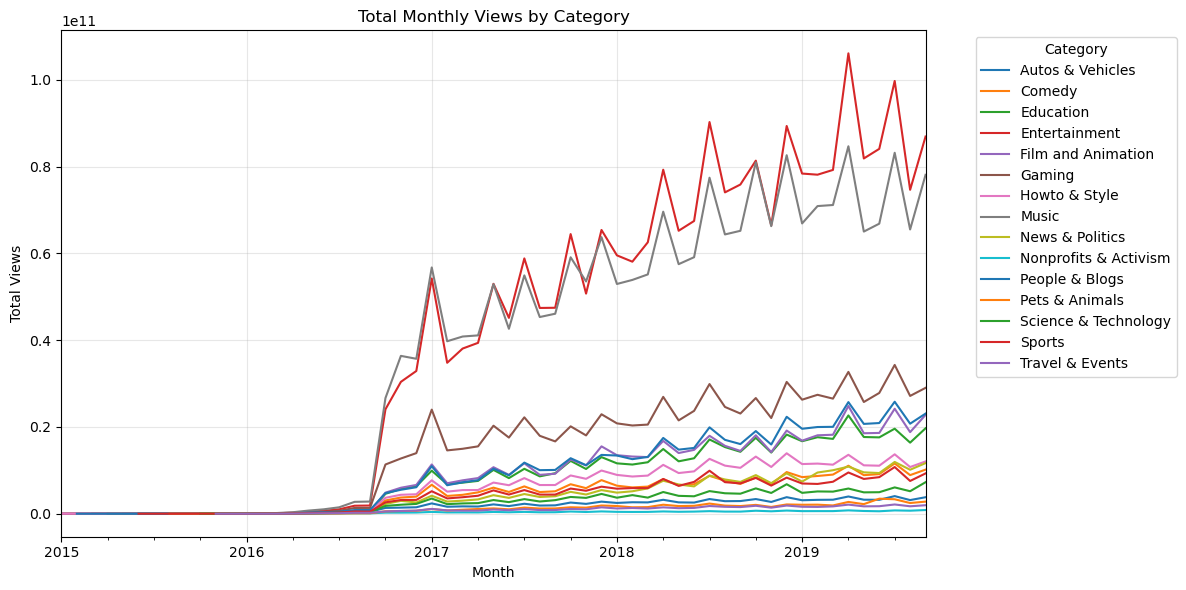

In [96]:
plot_monthly_metric_by_category(time_series, metric='delta_views')

These two graphs show a cyclical evolution in the number of subscribers and views. This can be influenced by time periods when more people use YouTube, such as during holidays. Additionally, in winter, people tend to stay indoors and watch more content online.

We observe a spike in subscribers in March 2023 for the Music category, which could be due to a music artist going viral and gaining subscribers rapidly.

However, we lack sufficient data between 2015 and the end of 2016, which prevents us from fully analyzing the entire period from 2015 to 2019.

### Number of new channels per month.

In [101]:

def plot_smoothed_monthly_channel_counts_by_category(data, window=3):

    data['join_date'] = pd.to_datetime(data['join_date'], errors='coerce')
    data['month'] = data['join_date'].dt.to_period('M')
    monthly_counts = data.groupby(['category_cc', 'month']).size().unstack(fill_value=0)
    
    monthly_counts_smoothed = monthly_counts.T.rolling(window=window, min_periods=1).mean()
    
    plt.figure(figsize=(12, 6))
    monthly_counts_smoothed.plot(kind='line', figsize=(12, 6), title=f"Number of channels created per month by category (moving average of {window} months)")
    plt.xlabel("Month")
    plt.ylabel("Number of channels created")
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(alpha=0.3)
    plt.show()


<Figure size 1200x600 with 0 Axes>

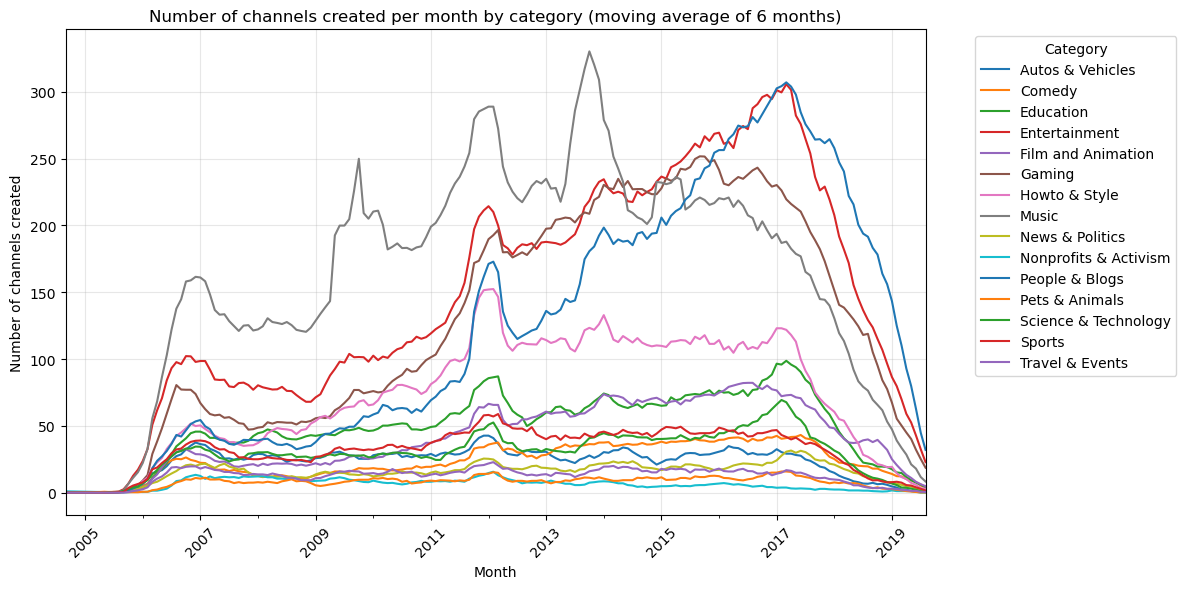

In [103]:
plot_smoothed_monthly_channel_counts_by_category(channels, window=6)

This graph, which represents the number of channels created per month by category, reveals several interesting trends.

- First, it's important to note that our dataset represents videos from channels with more than 10k subscribers and more than 10 videos—channels that have essentially "made it". This is evident in the effects at the extremes of the graph. This limitation could introduce bias into our analysis.
- One notable trend is a general increase in all categories around 2012, likely due to a broader effect, possibly related to YouTube's growth or access at that time.
- Additionally, we observe that music channels were dominant until mid-2014, with peaks in channel creation driven by trends, as YouTube was primarily used to share music during this period. Few people were making a living on YouTube in other domains, which explains the lower creation rates in those categories.
- As the years go by, however, Entertainment and People & Blogs categories begin to emerge as YouTube staples, with more individuals becoming well-known and turning their channels into full-time careers, pushing these categories to the forefront by 2017.